In [212]:
# importing the necessary libraries
import numpy as np
import pandas as pd 

In [213]:
raw_df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv',encoding_errors='ignore')

In [214]:
raw_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [215]:

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [216]:
# checking for null values
raw_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [217]:
len(raw_df)

4340

In [218]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [219]:
# now checking for cardinality for each of the unique elements in the categorical variables
raw_df.select_dtypes(include = 'object').columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [220]:
# checking for cardinality in name
raw_df.value_counts('name')

name
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

In [221]:
raw_df.name.nunique()

1491

In [222]:
# checking for cardinality in seller
raw_df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [223]:
# checking for cardinality offerType  
raw_df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [224]:
# checking for cardinality in transmission
raw_df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [225]:
# splitting the data
df_cat = raw_df[raw_df.select_dtypes(include = 'object').columns]
df_cont = raw_df[raw_df.select_dtypes(exclude = 'object').columns]

In [226]:
df_cat.columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [227]:
df_cont.columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

In [228]:
df_cont.year.max()

2020

In [229]:
df_cont.year.min()

1992

In [230]:
df_cont.selling_price.max()

8900000

In [231]:
df_cont.selling_price.min()

20000

In [232]:
df_cont.km_driven.max()

806599

In [233]:
df_cont.km_driven.min()

1

In [234]:
raw_df.sort_values(by = 'km_driven')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car
1291,Maruti Alto 800 VXI,2020,350000,1000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner


Text(0, 0.5, 'km_driven')

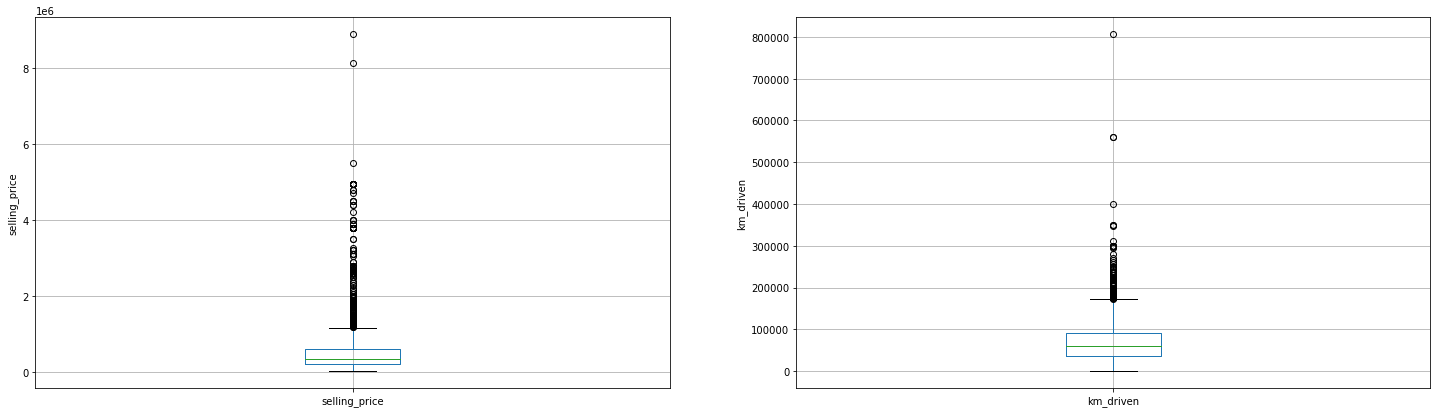

In [235]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))


plt.subplot(2, 2, 1)
fig = df_cont.boxplot(column='selling_price')
fig.set_title('')
fig.set_ylabel('selling_price')


plt.subplot(2, 2, 2)
fig = df_cont.boxplot(column='km_driven')
fig.set_title('')
fig.set_ylabel('km_driven')





Text(0, 0.5, 'km_driven')

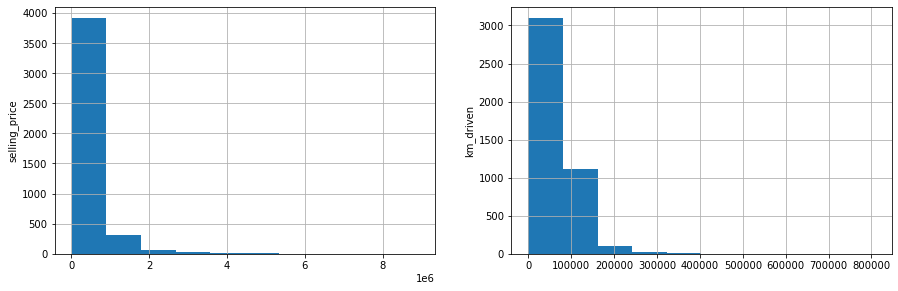

In [236]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df_cont.selling_price.hist(bins=10)
# fig.set_xlabel('Rainfall')
fig.set_ylabel('selling_price')


plt.subplot(2, 2, 2)
fig = df_cont.km_driven.hist(bins=10)
# fig.set_xlabel('Evaporation')
fig.set_ylabel('km_driven')





In [237]:
# when we are trying to remove the outlier around 10 percent records dropped so to minimize the data loss
#we are not removing outlier. 


In [238]:
# ploting scatter plot between the continous features and the target varaiable to check if a linear relationship exist or not
#plt.scatter()
temp_list = list(df_cont.select_dtypes(exclude = ['object']).columns)
temp_list.remove('selling_price')

In [239]:
def scatter_plot(col_name):
    fig, ax = plt.subplots()
    ax.scatter(df_cont[col_name],df_cont.selling_price)
    ax.set_xlabel(col_name)
    ax.set_ylabel('selling_price')
    plt.show()
    

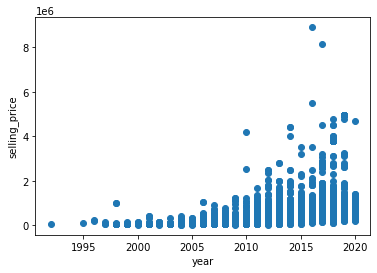

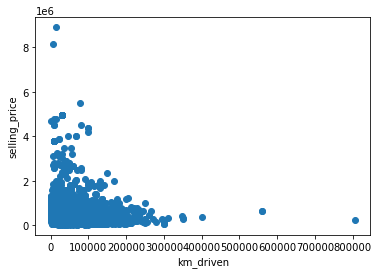

In [240]:
for i in temp_list:
    scatter_plot(i)

In [241]:
# detecting and removing outliers, since there are more outliers in the selling price removing the outliers for selling price.

def remove_outliers(field_name, df_subset_cont = raw_df):
    iqr = df_subset_cont[field_name].quantile(0.75) - df_subset_cont[field_name].quantile(0.25)
    q1 = df_subset_cont[field_name].quantile(0.25)
    q3 = df_subset_cont[field_name].quantile(0.75)
    upp_lim = q3 + 1.5*iqr
#     print(field_name upper limit =' + upp_lim)
    low_lim = q1 - 1.5*iqr
#     print(field_name + ' lower limit ' + '=' + low_lim)
    print(field_name + '-before removing outliers ')
    print(df_subset_cont[field_name].count())
    df_subset_cont = df_subset_cont[low_lim <= df_subset_cont[field_name]]
    df_subset_cont = df_subset_cont[df_subset_cont[field_name] <= upp_lim]
    print(field_name + '-after removing outliers ')
    print(df_subset_cont[field_name].count())
    return df_subset_cont

In [242]:
for i in ['km_driven']:
    raw_df = remove_outliers(i, raw_df)

km_driven-before removing outliers 
4340
km_driven-after removing outliers 
4230


In [243]:
correlation = raw_df.corr()

In [244]:
correlation

,year,selling_price,km_driven
year,1.000000,0.413204,-0.472507
selling_price,0.413204,1.000000,-0.225001
km_driven,-0.472507,-0.225001,1.000000


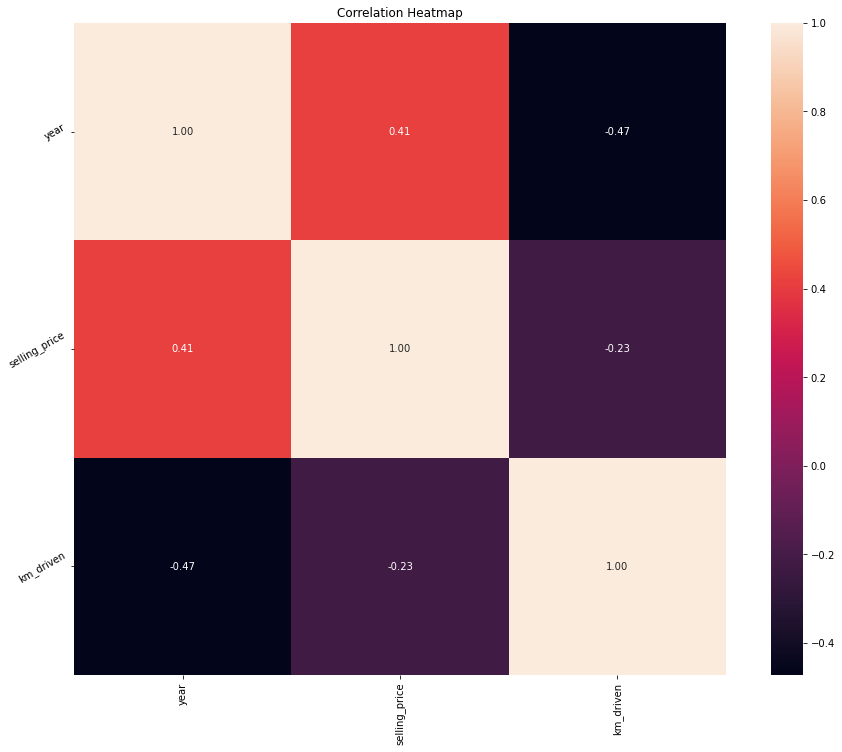

In [245]:
import seaborn as sns
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [246]:
# identifying the features with very high correlation 
temp_dict = {}
for i in correlation.index:
    for j in correlation.columns:
        if (correlation.loc[i, j] > 0.75 and correlation.loc[i, j] < 1) or (correlation.loc[i, j] < -0.75):
            temp_dict[i] = j

In [247]:
# As we can see here there are no variables with high correlation between them so no pint infinding VIF
temp_dict

{}

In [248]:
# splitting the dataframe into target and features
df_final_features = raw_df.drop('selling_price', axis = 1)
df_final_target = raw_df['selling_price']

In [249]:
df_final_features.nunique()

name            1465
year              27
km_driven        719
fuel               5
seller_type        3
transmission       2
owner              5
dtype: int64

In [250]:
df_encoded_features = df_final_features

In [251]:
# Will use label encoder for the name coloumn for the other columns get dummies will be used. 
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

# for i in df_encoded_features.select_dtypes(include = ['object']).columns:
df_encoded_features['name']= label_encoder.fit_transform(df_encoded_features['name'])
  


In [252]:
df_encoded_features.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,760,2007,70000,Petrol,Individual,Manual,First Owner
1,1025,2007,50000,Petrol,Individual,Manual,First Owner
2,498,2012,100000,Diesel,Individual,Manual,First Owner
3,115,2017,46000,Petrol,Individual,Manual,First Owner
4,273,2014,141000,Diesel,Individual,Manual,Second Owner


In [253]:
# then use pd. get dummies for the other categorical variables
dumm_features = pd.get_dummies(df_encoded_features, drop_first=True)    

In [254]:
# now applying min max scaler to scale the varaiables
from sklearn import preprocessing as PPC
scaler = PPC.MinMaxScaler(feature_range=(0, 1))

features_scaled = scaler.fit_transform(dumm_features)

In [255]:
scaled_features = pd.DataFrame(features_scaled, columns = dumm_features.columns)

In [256]:
# divding the into train-test
X = scaled_features[:]
y = df_final_target[:]

In [257]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [258]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [259]:
# training score 
reg.score(X_train, y_train)

0.463621518152603

In [260]:
reg.score(X_test, y_test)

0.4604417665522529

In [261]:
# now trying a random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [262]:
from sklearn.metrics import r2_score
y_pred = regr.predict(X_test)

In [263]:
print(r2_score(y_test,y_pred))  #R2 SCORE ON TEST DATA

0.48962967162852655


In [264]:
# now trying to calculate the accuracy after doing a lg transformation on the target. since our target variable is highly skewed. 
import math
target_transformed = y_train.apply(lambda x : math.log(x))

<AxesSubplot:>

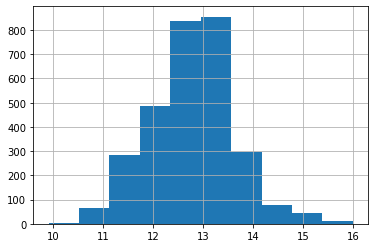

In [265]:
# checking the  ditribution of the transformed target
target_transformed.hist()

In [266]:
# now again training a linear regressor model on the transformed target.
reg1 = LinearRegression()
reg1.fit(X_train, target_transformed)

LinearRegression()

In [267]:
# now checking the training accuracy 
reg1.score(X_train, target_transformed)

0.6916075171316831

In [268]:
# now checking the testing accuracy 
pred = reg1.predict(X_test)

In [269]:
import numpy as np
print(r2_score(y_test,np.exp(pred)))

0.5804496224335132


In [270]:
# now trying to optimize my random forest regressor
temp = 0 
i = 1
while True:
    tree = RandomForestRegressor(max_depth = i, random_state = 42)
    tree.fit(X_train,y_train)
    training_acc1 = tree.score(X_train,y_train)
    y_predict = tree.predict(X_test)
    score = r2_score(y_test,y_predict)
    if score > temp:
        temp = score
        optimal_depth = i
        accuracy = temp
        i = i + 1
    else:
        break


In [271]:
print('training accuracy  {train_acc}'.format(train_acc = training_acc1))
print('optimal_depth   {depth}'.format(depth = optimal_depth))
print('testing accuracy   {acc}'.format(acc  = accuracy))

training accuracy  0.961651985112197
optimal_depth   12
testing accuracy   0.7685172473433866


In [272]:
# now will try to change the hyperparameter min sample leaf to decrease the overfitting. 
temp = 0 
i = 1
while True:
    tree2 = RandomForestRegressor( max_depth = i,min_samples_leaf = 5, random_state = 42)
    tree2.fit(X_train,y_train)
    training_acc = tree2.score(X_train,y_train)
    y_predict = tree2.predict(X_test)
    score = r2_score(y_test,y_predict)
    if score > temp:
        temp = score
        optimal_depth1 = i
        accuracy1 = temp
        i = i + 1
    else:
        break

In [273]:
# as we can see here the with using the min sample leaf as 5 we could decrese the overfitting of our model. Now the training accuracy 
# is coming as 81.49 % with testing accuracy of 77.13 %
print('training accuracy  {train_acc}'.format(train_acc = training_acc))
print('optimal_depth   {depth}'.format(depth = optimal_depth1))
print('testing accuracy   {acc}'.format(acc  = accuracy1))

training accuracy  0.8194605309388799
optimal_depth   18
testing accuracy   0.7713830192739898
